# ggplot2

The `ggplot2` package helps you plot graphics with a `grammar`. The grammar provides a way to talk about parts of a plot. The grammar talks about the following `components` of a plot.

* `data` is what is being plotted
* `geometric objects` are the shapes and lines that appear on the plot
* `aesthetics` are the appearance of the geometric objects and the mapping of variables to such aesthetics
* `position adjustment` is the placement of elements
* `scale` is the range of values for each aesthetic mapping
* `coordinate system` is used to organize the geometric objects
* `facets` are groupos of data shown in differen plots

## Geometries

### geom_point

The `geom_point` is used for drawing individual points.

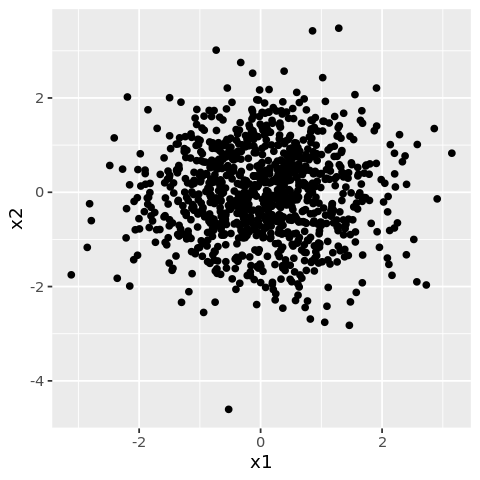

In [1]:
library('ggplot2')
library('repr')

df <- data.frame(
    x1 = rnorm(1000),
    x2 = rnorm(1000)
)

options(repr.plot.width=4, repr.plot.height=4)

ggplot(df) +
    geom_point(mapping=aes(x=x1, y=x2))

### geom_hex

The `geom_hex` function is used for drawing individual points as hexagons.

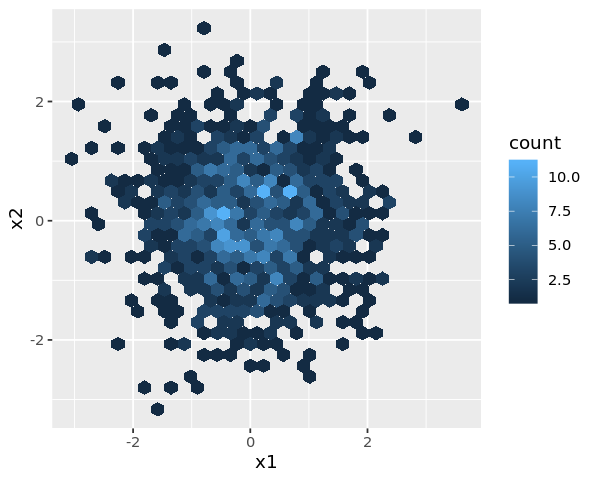

In [2]:
df <- data.frame(
    x1 = rnorm(1000),
    x2 = rnorm(1000)
)

options(repr.plot.width=5, repr.plot.height=4)

ggplot(df) +
    geom_hex(mapping=aes(x=x1, y=x2))

### geom_line

The `geom_line` function is used for drawing lines.

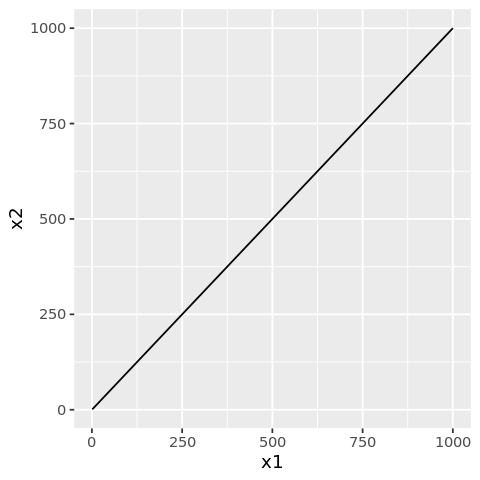

In [3]:
df <- data.frame(
    x1 = seq(1, 1000),
    x2 = seq(1, 1000)
)

options(repr.plot.width=4, repr.plot.height=4)

ggplot(df) +
    geom_line(mapping=aes(x=x1, y=x2))

### geom_smooth

The `geom_smooth` function is used to draw a smoothed line.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


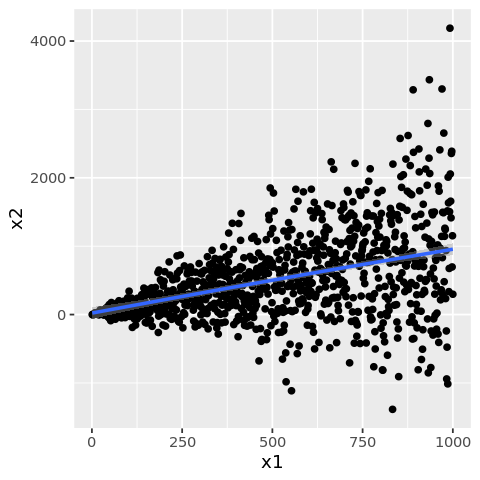

In [4]:
df <- data.frame(
    x1 = seq(1, 1000),
    x2 = seq(1, 1000) + (rnorm(1000) * seq(1, 1000))
)

options(repr.plot.width=4, repr.plot.height=4)

ggplot(df) +
    geom_point(mapping=aes(x=x1, y=x2)) +
    geom_smooth(mapping=aes(x=x1, y=x2))

### geom_col

The `geom_col` function is used to draw bars.

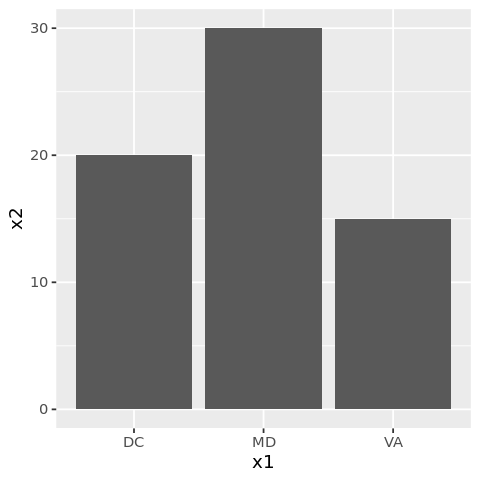

In [5]:
df <- data.frame(
    x1 = c('DC', 'MD', 'VA'),
    x2 = c(20, 30, 15)
)

options(repr.plot.width=4, repr.plot.height=4)

ggplot(df) +
    geom_col(mapping=aes(x=x1, y=x2))

## Aesthetic mapping

Aesthetics may be used to change colors.

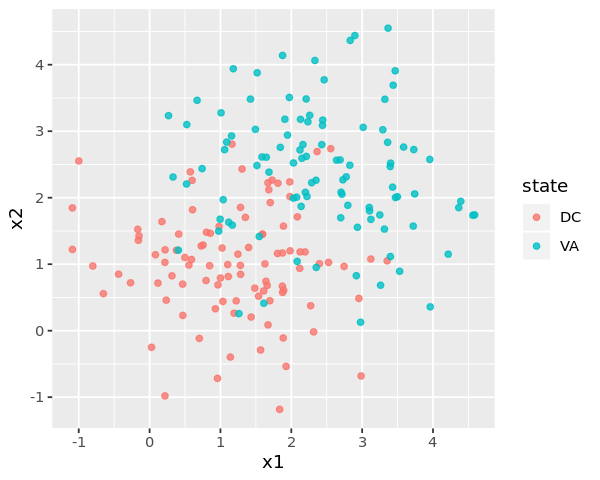

In [6]:
df <- data.frame(
    x1 = c(rnorm(100, mean=1, sd=1), rnorm(100, mean=2.5, sd=1)),
    x2 = c(rnorm(100, mean=1, sd=1), rnorm(100, mean=2.5, sd=1)),
    state = c(rep('DC', 100), rep('VA', 100))
)

options(repr.plot.width=5, repr.plot.height=4)

ggplot(df) +
    geom_point(mapping=aes(x=x1, y=x2, color=state), alpha=0.8)

## Position

Positioning can change the placement of elements and produce different types of plots.

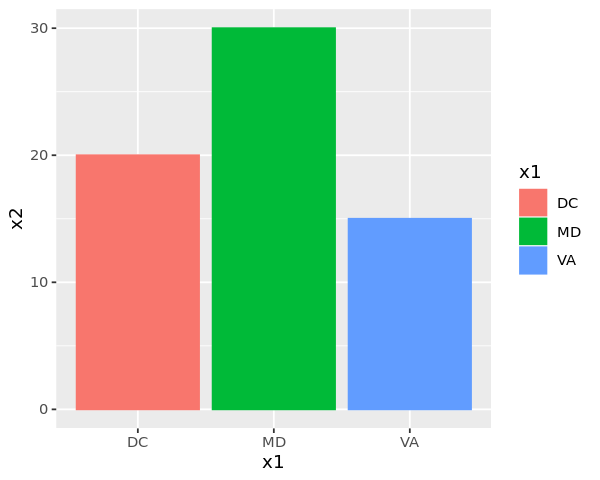

In [7]:
df <- data.frame(
    x1 = c('DC', 'MD', 'VA'),
    x2 = c(20, 30, 15)
)

options(repr.plot.width=5, repr.plot.height=4)

ggplot(df) +
    geom_col(mapping=aes(x=x1, y=x2, color=x1, fill=x1))

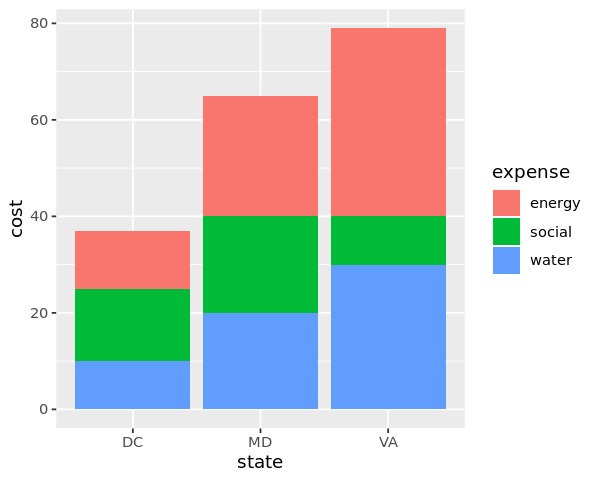

In [8]:
library('tidyr')

df <- data.frame(
    state = c('DC', 'MD', 'VA'),
    water = c(10, 20, 30),
    energy = c(12, 25, 39),
    social = c(15, 20, 10)
)

n <- df %>%
        pivot_longer(-state, names_to='expense', values_to='cost')

options(repr.plot.width=5, repr.plot.height=4)

ggplot(n) + 
    geom_col(mapping=aes(x=state, y=cost, fill=expense))

When `position='fill'`, the stacked bars are forced to 100%.

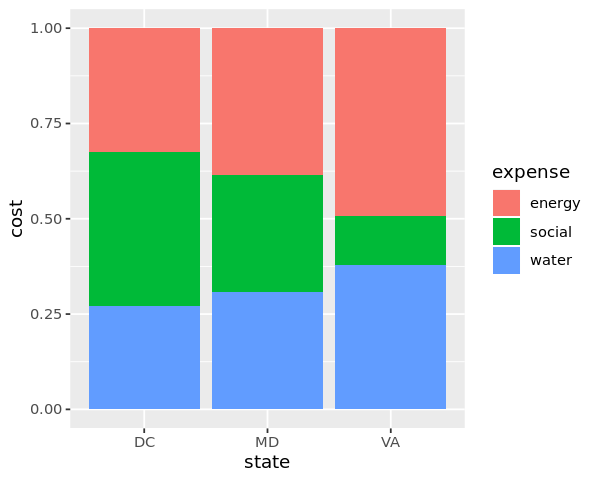

In [9]:
options(repr.plot.width=5, repr.plot.height=4)

ggplot(n) + 
    geom_col(mapping=aes(x=state, y=cost, fill=expense), position='fill')

When `position='dodge` the bars are side-by-side.

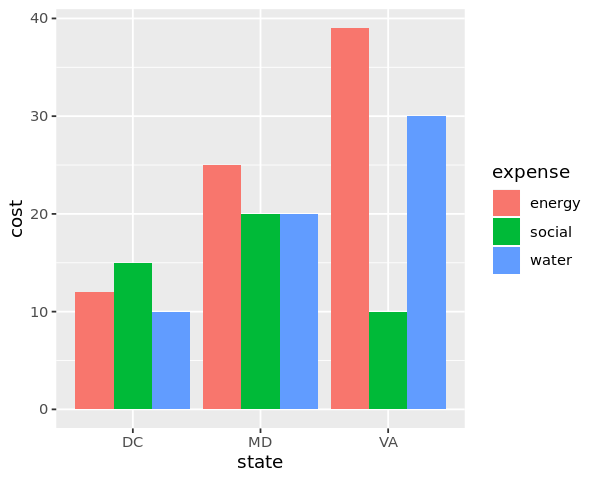

In [10]:
options(repr.plot.width=5, repr.plot.height=4)

ggplot(n) + 
    geom_col(mapping=aes(x=state, y=cost, fill=expense), position='dodge')

## Scale

Scaling may help to zoom in or out of the plot, as well as rescale the axes.

In [11]:
df <- data.frame(
    x1 = c(rnorm(100, mean=10, sd=1), rnorm(100, mean=25, sd=1)),
    x2 = c(rnorm(100, mean=10, sd=1), rnorm(100, mean=25, sd=1)),
    state = c(rep('DC', 100), rep('VA', 100))
)

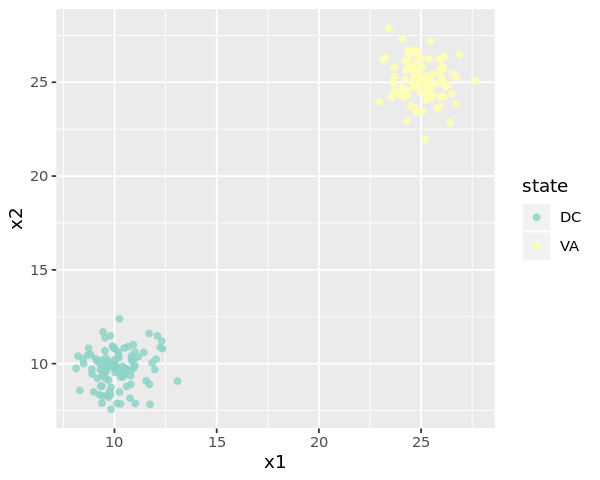

In [12]:
options(repr.plot.width=5, repr.plot.height=4)

ggplot(df) +
    geom_point(mapping=aes(x=x1, y=x2, color=state), alpha=0.8) +
    scale_color_brewer(palette='Set3') +
    scale_x_continuous() +
    scale_y_continuous()

Warning message:
“Removed 100 rows containing missing values (geom_point).”

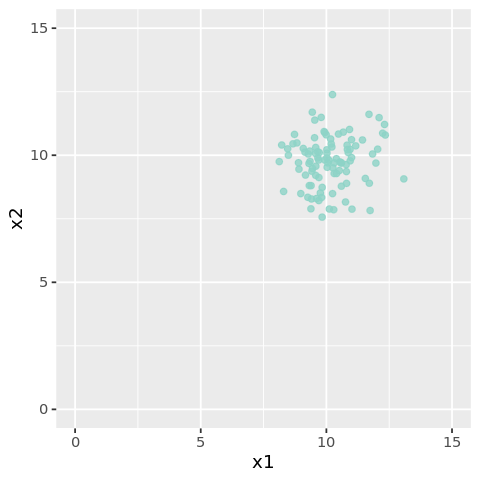

In [13]:
options(repr.plot.width=4, repr.plot.height=4)

ggplot(df) +
    geom_point(mapping=aes(x=x1, y=x2, color=state), alpha=0.8) +
    scale_color_brewer(palette='Set3') +
    scale_x_continuous(limits=c(0, 15)) +
    scale_y_continuous(limits=c(0, 15)) +
    theme(legend.position='none')

Warning message:
“Removed 100 rows containing missing values (geom_point).”

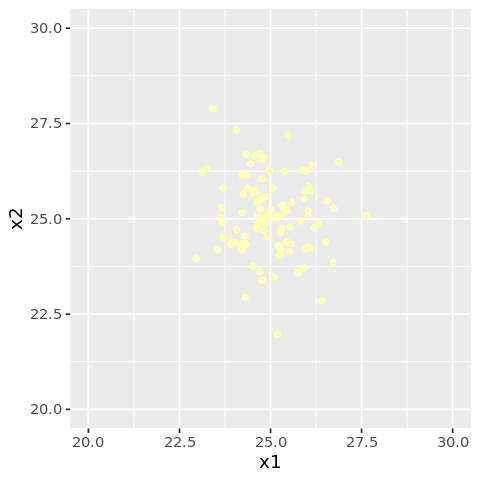

In [14]:
options(repr.plot.width=4, repr.plot.height=4)

ggplot(df) +
    geom_point(mapping=aes(x=x1, y=x2, color=state), alpha=0.8) +
    scale_color_brewer(palette='Set3') +
    scale_x_continuous(limits=c(20, 30)) +
    scale_y_continuous(limits=c(20, 30)) +
    theme(legend.position='none')

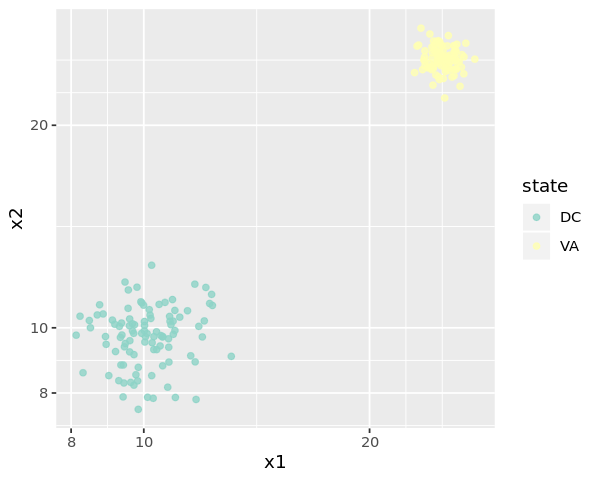

In [15]:
options(repr.plot.width=5, repr.plot.height=4)

ggplot(df) +
    geom_point(mapping=aes(x=x1, y=x2, color=state), alpha=0.8) +
    scale_color_brewer(palette='Set3') +
    scale_x_log10() +
    scale_y_log10()

## Coordinate

Coordinate functions such as `coord_flip` and `coord_polar` can change the type and look of a plot.

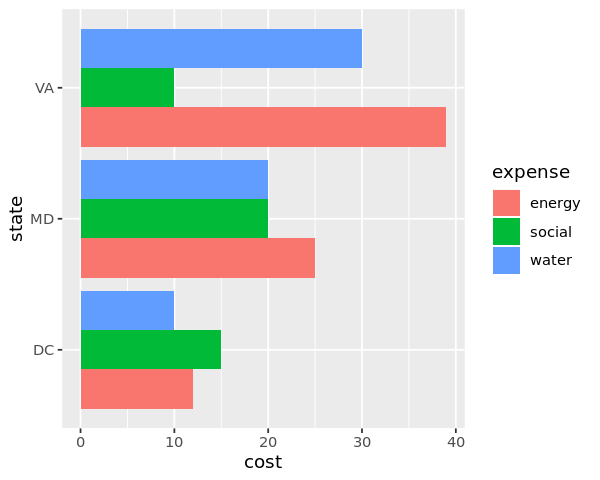

In [16]:
df <- data.frame(
    state = c('DC', 'MD', 'VA'),
    water = c(10, 20, 30),
    energy = c(12, 25, 39),
    social = c(15, 20, 10)
)

n <- df %>%
        pivot_longer(-state, names_to='expense', values_to='cost')

options(repr.plot.width=5, repr.plot.height=4)

ggplot(n) + 
    geom_col(mapping=aes(x=state, y=cost, fill=expense), position='dodge') +
    coord_flip()

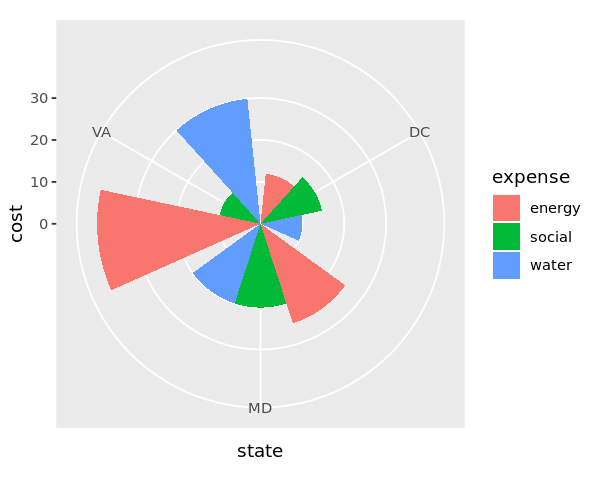

In [17]:
options(repr.plot.width=5, repr.plot.height=4)

ggplot(n) + 
    geom_col(mapping=aes(x=state, y=cost, fill=expense), position='dodge') +
    coord_polar()

## Facets

Facets can create subplots.

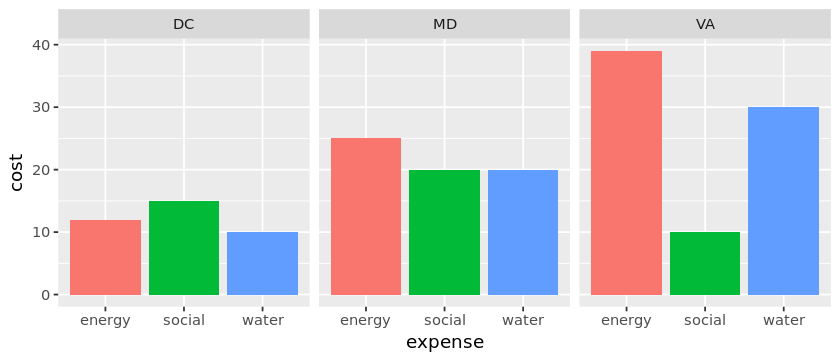

In [18]:
df <- data.frame(
    state = c('DC', 'MD', 'VA'),
    water = c(10, 20, 30),
    energy = c(12, 25, 39),
    social = c(15, 20, 10)
)

n <- df %>%
        pivot_longer(-state, names_to='expense', values_to='cost')

options(repr.plot.width=7, repr.plot.height=3)

ggplot(n) + 
    geom_col(mapping=aes(x=expense, y=cost, fill=expense)) +
    facet_wrap(~state) +
    theme(legend.position='none')

## Labels and annotations

You may modify the title, axes and legend with `labs`. You may use `geom_label_repel` from the `ggrepel` library to annotate specific coordinates.

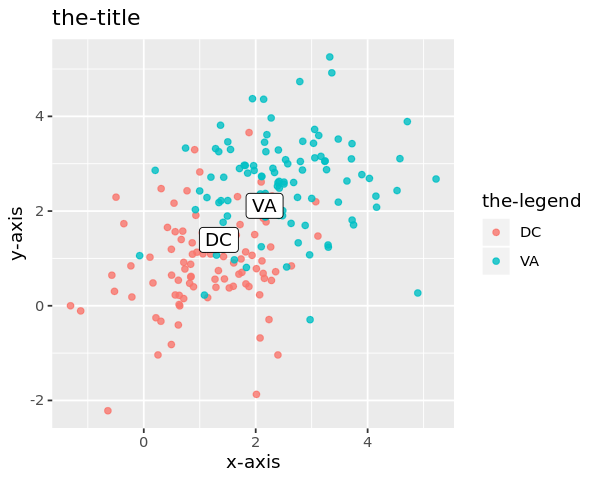

In [19]:
library('ggrepel')

df <- data.frame(
    x1 = c(rnorm(100, mean=1, sd=1), rnorm(100, mean=2.5, sd=1)),
    x2 = c(rnorm(100, mean=1, sd=1), rnorm(100, mean=2.5, sd=1)),
    state = c(rep('DC', 100), rep('VA', 100))
)

centers <- data.frame(
    x1 = c(1.0, 2.5),
    x2 = c(1.0, 2.5),
    state = c('DC', 'VA')
)

options(repr.plot.width=5, repr.plot.height=4)

ggplot(df) +
    geom_point(mapping=aes(x=x1, y=x2, color=state), alpha=0.8) +
    geom_label_repel(data=centers, mapping=aes(x=x1, y=x2, label=state)) +
    labs(
        title ='the-title',
        x='x-axis',
        y='y-axis',
        color='the-legend'
    )

## Choropleth map

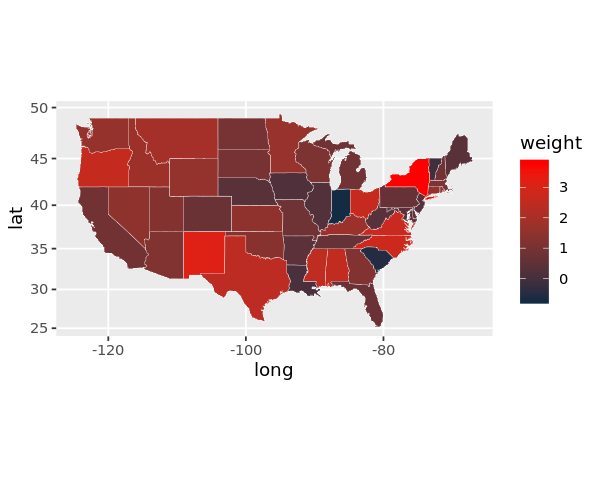

In [20]:
suppressMessages({
    library('dplyr')
})

allStates <- unique(map_data('state')$region)
x <- rnorm(length(allStates), mean=1, sd=1)

randomData <- data.frame(
    region=allStates,
    weight=x,
    stringsAsFactors=FALSE
)

df <- randomData %>%
    left_join(map_data('state'), by='region')

ggplot(df) +
    geom_polygon(
        mapping=aes(x=long, y=lat, group=group, fill=weight),
        color='white',
        size=0.1
      ) +
      coord_map() +
      scale_fill_continuous(low = "#132B43", high = "Red")